In [2]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

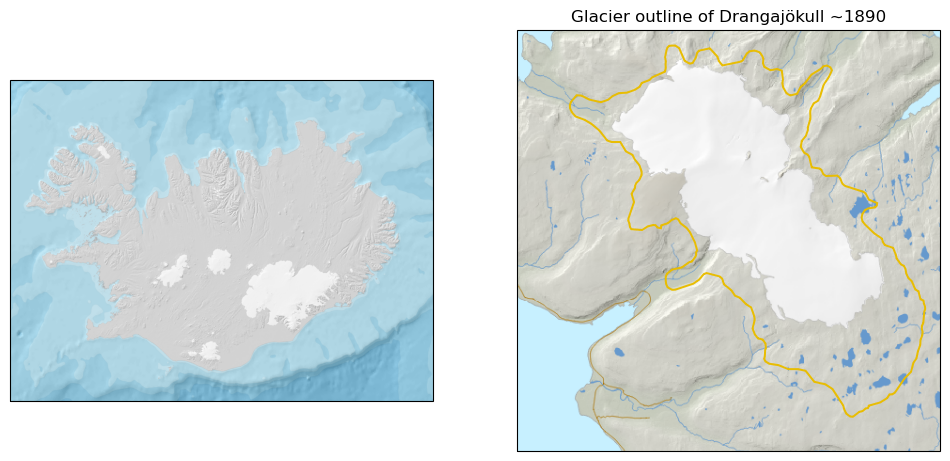

In [3]:
# we will create two images in different scales
# first image only addeds the basemap tiles
# second image zooms in to Drangajökull glacier and adds a WMS layer
# showing the estimated outline of the glacier at 1890

def main():
    
    # note that even tough
    IMO_basemap = cimgt.GoogleTiles(url="https://geo.vedur.is/geoserver/www/imo_basemap_epsg3857/{z}/{x}/{y}.png")
    
    fig = plt.figure(figsize=(12,12))
    
    # first image
    ax = fig.add_subplot(1, 2, 1, projection=IMO_basemap.crs)
    ax.set_extent([-25, -12.5, 67, 63])
    ax.add_image(IMO_basemap, 8)
    
    # second image, note wms_kwargs where we remove white backgound from wms layer and display above basemap
    ax = fig.add_subplot(1, 2, 2, projection=IMO_basemap.crs)
    ax.set_extent([-22.57, -21.95, 66, 66.25])
    ax.add_wms("https://geo.vedur.is/geoserver/wms",
               layers=["glaciology:glacieroutline_lia"],
               wms_kwargs={'transparent':True}, zorder=10)
    ax.add_image(IMO_basemap, 10)
    
    plt.title("Glacier outline of Drangajökull ~1890")

    plt.show()


if __name__ == '__main__':
    main()

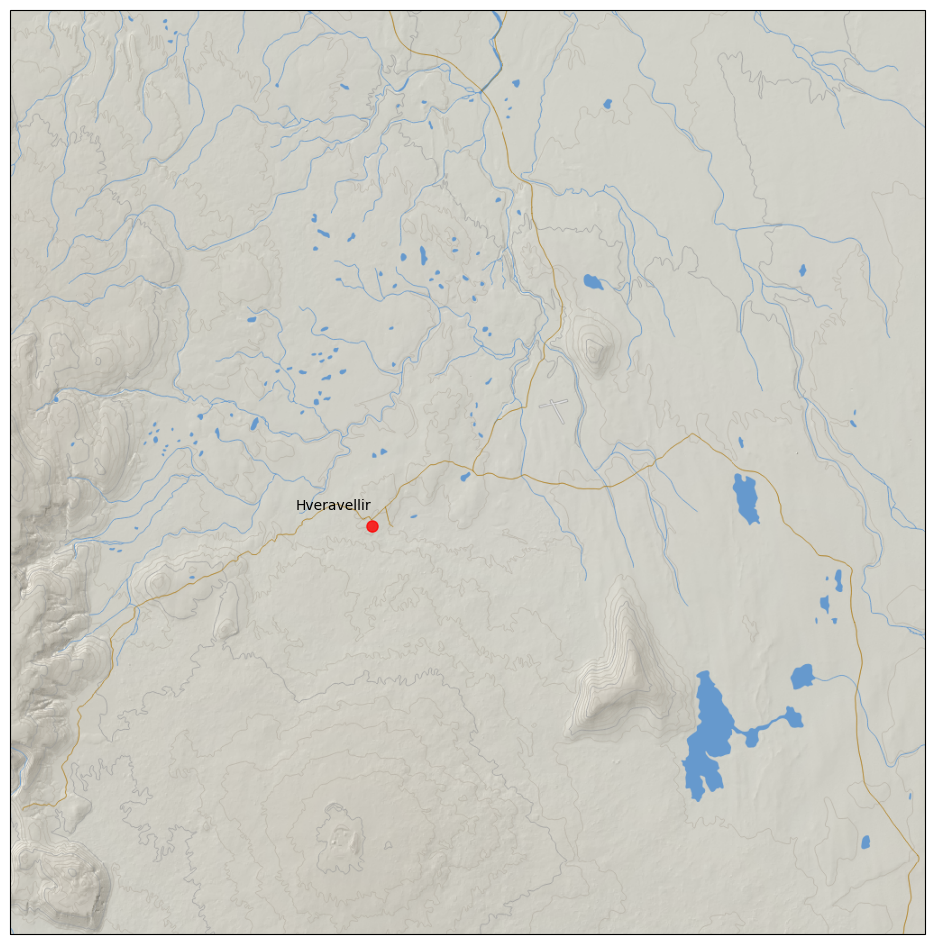

In [4]:
# lets create a new map and add a point with label


def main():
    IMO_basemap = cimgt.GoogleTiles(url="https://geo.vedur.is/geoserver/www/imo_basemap_epsg3857/{z}/{x}/{y}.png")
    fig = plt.figure(figsize=(12,12))
    
    ax = fig.add_subplot(1, 1, 1, projection=IMO_basemap.crs)
    ax.set_extent([-19.7, -19.35, 64.95, 64.8])
    ax.add_image(IMO_basemap, 12)
    # add a red point to the map
    ax.plot(-19.56178, 64.86634,
            marker='o',
            color='red',
            markersize=8,
            alpha=0.8,
            transform=ccrs.Geodetic()
           )
    
    # create a transform object to shift label text
    geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
    text_transform = offset_copy(geodetic_transform, units='dots', y=20)
    # add label text
    ax.text(-19.56178, 64.86634, 'Hveravellir',
            verticalalignment='center',
            horizontalalignment='right',
            transform=text_transform)
    
    plt.show()
    
    
if __name__ == '__main__':
    main()  